# Project 03: Building a Classifier (Titanic)
**Author:**  James Pinkston  
**Date:**  November 9, 2025  
**Objective:**  P3: Evaluate three classifiers using the Titantic dataset:  Decision Tree, Support Vector Machine, and Neural Network.

## Section 1. Import and Inspect the Data

Load the Titanic dataset directly from the seaborn library.


In [43]:
# All imports should be at the top of the notebook

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
# Load Titanic Dataset
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

Impute missing values for age using the median:

In [45]:
median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)

Fill in missing values for embark_town using the mode:

In [46]:
mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)

### 2.2 Feature Engineering

Create new features:

In [47]:
# Create new feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Map categories to numeric values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Use **survived** as the target.
- We will do three input cases like the example.

Case 1:
- input featuers:  alone
- target:  survived

Case 2:
- input features:  age
- target:  survived

Case 3:
- input features:  age and family_size
- target:  survived

### 3.2 Define X (features) and y (target)

- Assign input features to X - a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time
- The following starts with only the statements needed for Case 1.
- Double brackets [[]] makes a 2D DataFrame
- Single brackets [] make a 1D Series

In [48]:
# Case 1: Feature = alone

# Select the feature 'alone' as input
X1 = titanic[['alone']]

# Select 'survived' as the target for the same rows
y1 = titanic['survived']

In [49]:
# Case 2: Feature = age (drop if na or not available)

# Select the feature 'age', but drop rows where age is missing
X2 = titanic[['age']].dropna()

# Select the matching 'survived' values using the same index
y2 = titanic.loc[X2.index, 'survived']

In [50]:
# Case 3: Features = age + family size (drop if na or not available)

# Select both 'age' and 'family_size', and drop rows where missing (na)
X3 = titanic[['age', 'family_size']].dropna()

# Select the corresponding 'survived' values for those rows
y3 = titanic.loc[X3.index, 'survived']

### Reflection 3:

Why are these features selected?  **These features are selected because families had a greater chance of surviving because they included children.**

Are there features that are likely to be highly predictive of survival?  **Yes. Family size is very likely to be highly predictive of survival.**

## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data

Split the data into training and test sets.

In [51]:
# Case 1: Feature = alone

splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):
    X1_train = X1.iloc[train_idx1]
    X1_test = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test = y1.iloc[test_idx1]

print('Case 1 - Alone:')
print('Train Size:', len(X1_train), '| Test Size:', len(X1_test))

Case 1 - Alone:
Train Size: 712 | Test Size: 179


In [52]:
# Case 2: Feature = age

splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test = y2.iloc[test_idx2]

print('Case 2 - Age:')
print('Train Size:', len(X2_train), '| Test Size:', len(X2_test))

Case 2 - Age:
Train Size: 712 | Test Size: 179


In [53]:
# Case 3: Feature = age + family_size

splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test = y3.iloc[test_idx3]

print('Case 3 - Age + Family Size:')
print('Train Size:', len(X3_train), '| Test Size:', len(X3_test))

Case 3 - Age + Family Size:
Train Size: 712 | Test Size: 179


### 4.2 Create and Train Model (Decision Tree)

Create and train a decision tree model with no random initializer argument.

Create and train all 3 cases.

In [54]:
# Case 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [55]:
# Case 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
# Case 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data.

Predict and evaluate all 3 cases.

In [57]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on Training Data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on Test Data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on Training Data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on Test Data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [58]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on Training Data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on Test Data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on Training Data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on Test Data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [59]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on Training Data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on Test Data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on Training Data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on Test Data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix as a heatmap.

Plot for all cases.

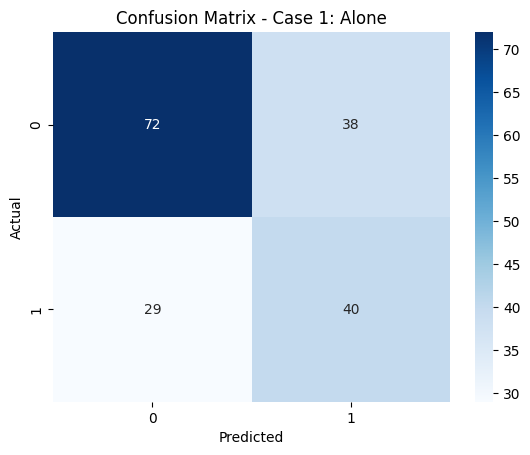

In [60]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1: Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

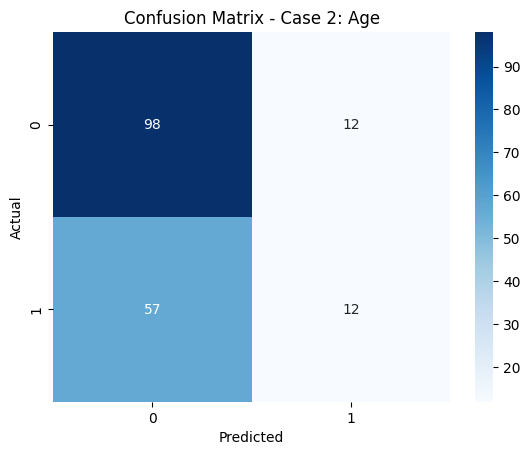

In [61]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2: Age')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

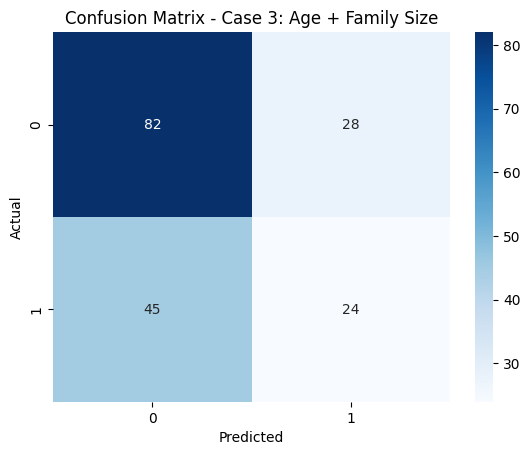

In [62]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3: Age + Family Size')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

Plot the decision tree model for each case.

Case 1

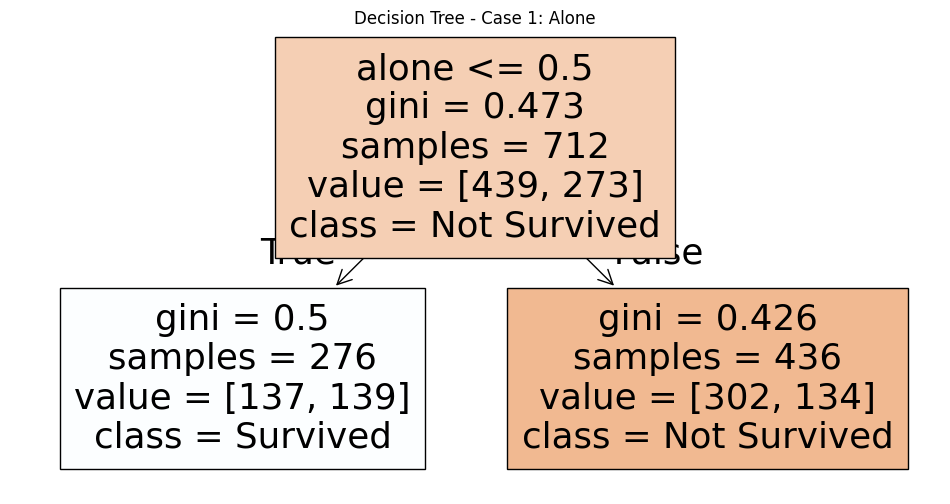

In [85]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")

# Save image
fig.savefig("tree_case1_alone.png")

plt.show()

Case 2

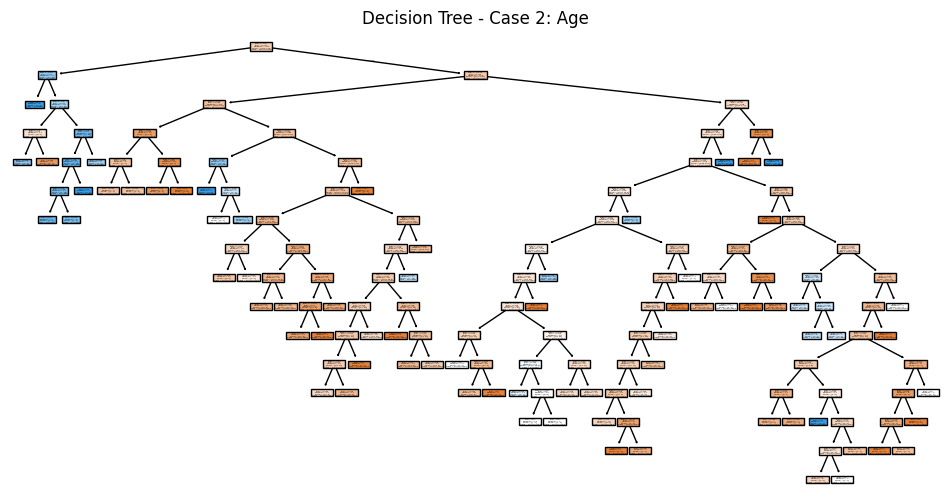

In [86]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 2: Age")

# Save image
fig.savefig("tree_case2_age.png")

plt.show()

Case 3

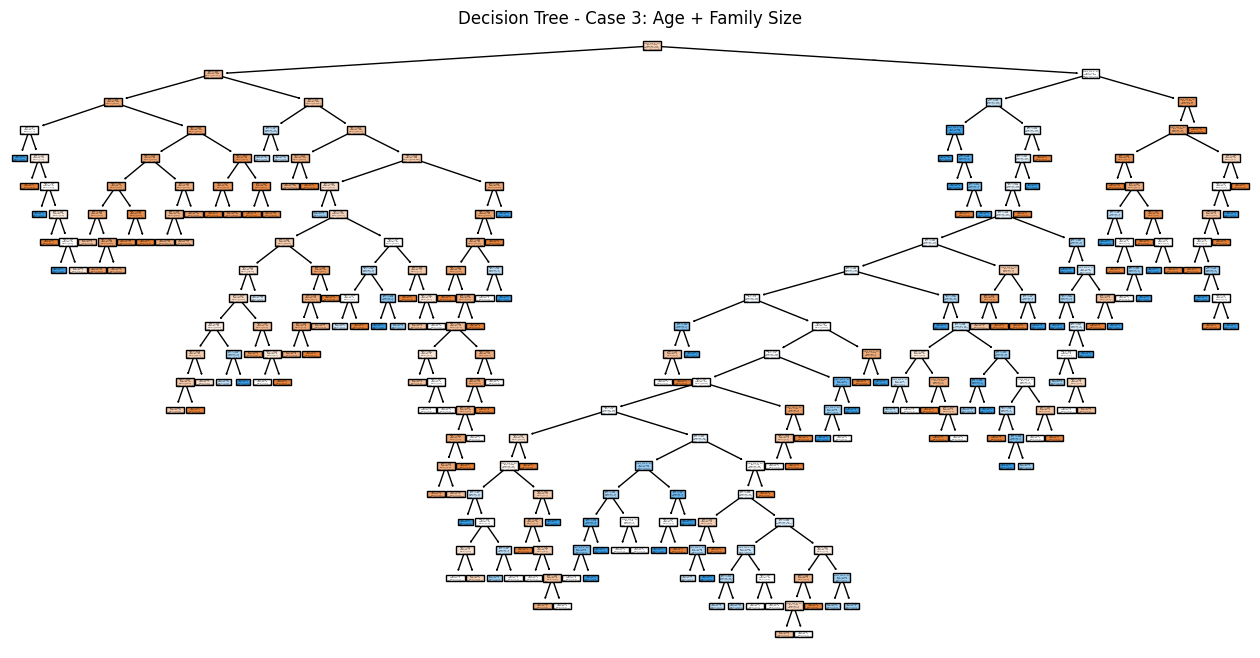

In [87]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")

# Save image
fig.savefig("tree_case3_age_family.png")

plt.show()

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | alone | 0.63 | 0.64 | 0.63 | 0.63 | - |
|                   | Case 2 | age | 0.61 | 0.58 | 0.61 | 0.55 | - |
|                   | Case 3 | age + family_size | 0.59 | 0.57 | 0.59 | 0.57 | - |

### Reflection 4:

- How well did the different cases perform? **Case 1 performed best on the test data. Training accurancy was higher on Cases 2 and 3, but test accurancy was lower.**
- Are there any surprising results? **Yes. I expected performancy to improve by adding age and/or family size, but performance decreased overall with Cases 2 and 3.**
- Which inputs worked better? **The single simple input of 'alone' worked the best. The more features that were added seems to have decreased performance.**

## Section 5. Compare Alternative Models (SVC, NN)

SVC

**RBF Kernel (default) - same as calling SVC()**  
svc_model = SVC(kernel='rbf')  
svc_model.fit(X_train, y_train)

**Linear Kernel**  
svc_model = SVC(kernel='linear')  
svc_model.fit(X_train, y_train)

**Polynomial Kernel (e.g., with degree=3)**  
svc_model = SVC(kernel='poly', degree=3)  
svc_model.fit(X_train, y_train)

**Sigmoid Kernel**  
svc_model = SVC(kernel='sigmoid')  
svc_model.fit(X_train, y_train)

### 5.1 Train and Evaluate Model (SVC)

First, train an SVC model using the default kernel.

Case 1

In [66]:
# Case 1: SVC using 'alone'

svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print(classification_report(y1_test, y1_svc_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



Case 2

In [67]:
# Case 2: SVC using 'age'

svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print(classification_report(y2_test, y2_svc_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



Case 3

In [68]:
# Case 3: SVC using 'age' and 'family_size'

svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print(classification_report(y3_test, y3_svc_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### 5.2 Visualize Support Vectors (1D Case 1 and 2D Case 3)

Create scatter plots to visualize support vectors.

Case 1

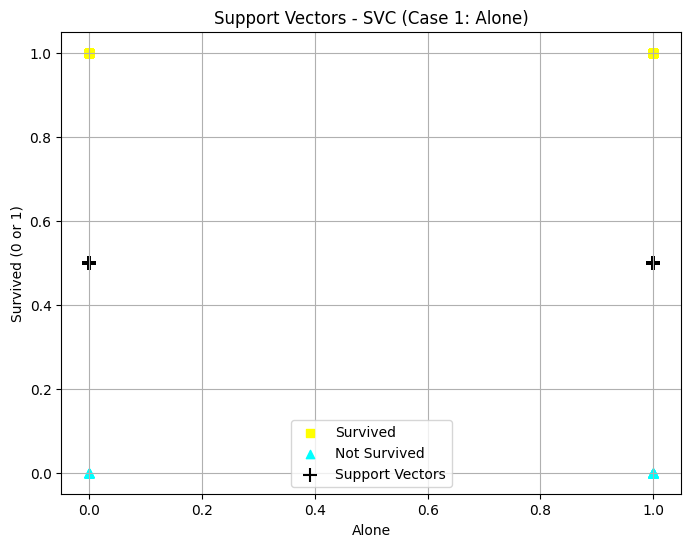

In [69]:
# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, 'support_vectors_'):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()

Case 3. Two Inputs, Two Dimensional Scatter Plot

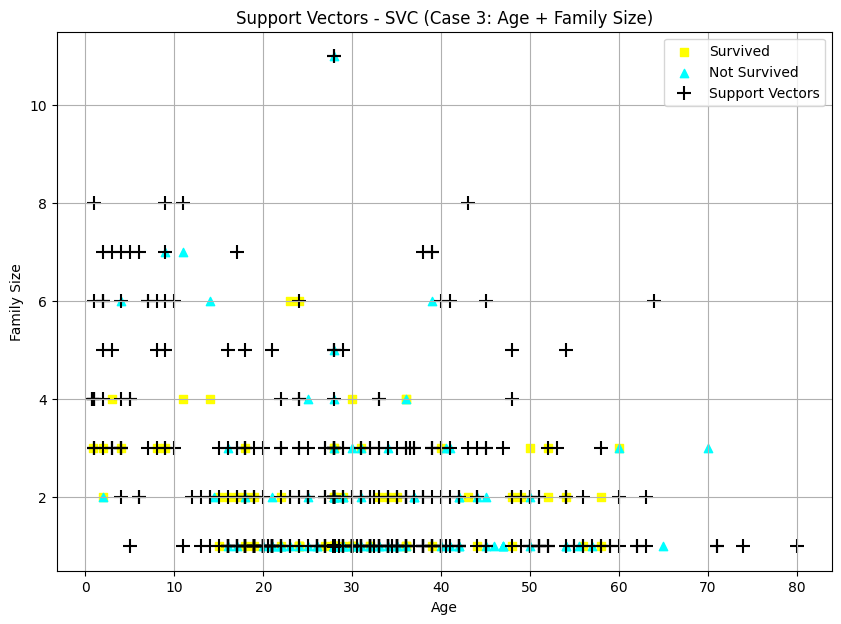

In [70]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived['age'], survived['family_size'],
            c='yellow', marker='s', label='Survived')

# Plot not survived (cyan triangles)
plt.scatter(not_survived['age'], not_survived['family_size'],
            c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
if hasattr(svc_model3, 'support_vectors_'):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c='black', marker='+', s=100, label='Support Vectors')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()

### 5.3 Train and Evaluate Model (Neural Network on Case 3)

Train NN on Case 3

In [71]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


Predict and Evaluate Neural Network Model:

In [72]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on Test Data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on Test Data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       110
           1       0.57      0.46      0.51        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.63       179
weighted avg       0.65      0.66      0.65       179



Plot Confusion Matrix:

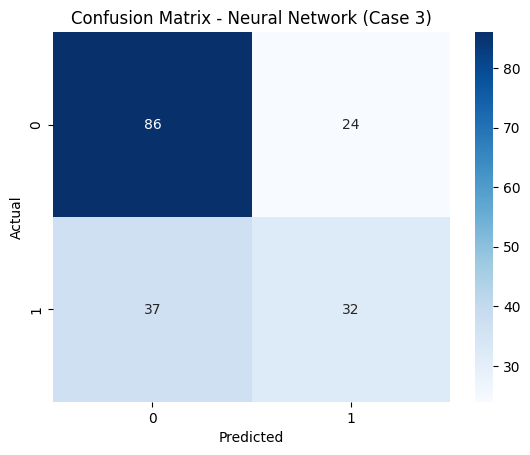

In [73]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.4 Visualize (Neural Network on Case 3)

Create a 2D plot

c:\Repos\applied_ml_pinkston\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


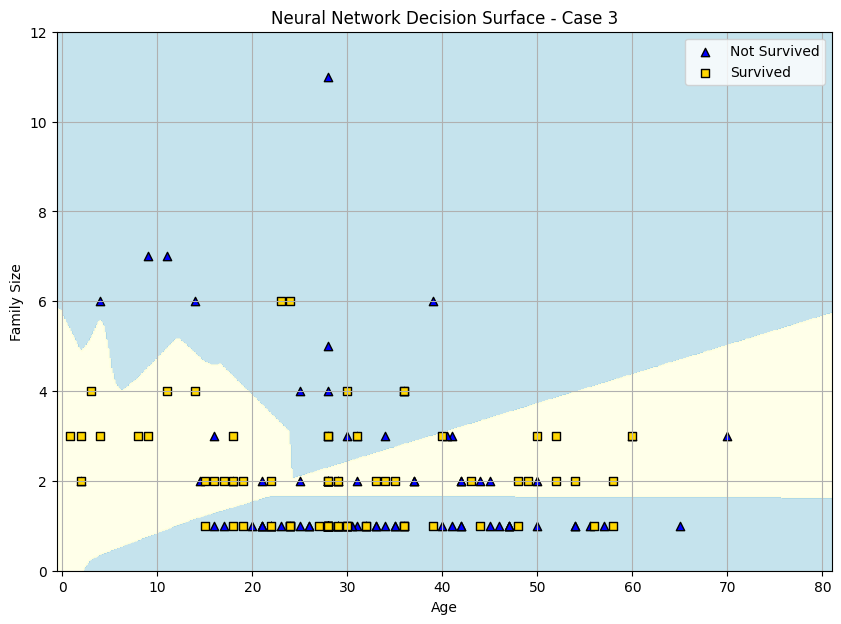

In [74]:
# Get the range of our two features - use padding to enhance appearance
padding = 1
x_min, x_max = X3['age'].min() - padding, X3['age'].max() + padding
y_min, y_max = X3['family_size'].min() - padding, X3['family_size'].max() + padding

# Create a meshgrid (all combinations of age and family_size)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), 
                     np.linspace(y_min, y_max, 500))

# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)
Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

# Plot the decision surface (background) showing predicted survival zones
# Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

# Overlay the actual test data points for visual comparison
# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X3_test['age'][y3_test == 0],
            X3_test['family_size'][y3_test == 0],
            c='blue', marker='^', edgecolor='k', label='Not Survived')

# Plot passengers who DID survive (1) as gold squares
plt.scatter(X3_test['age'][y3_test == 1],
            X3_test['family_size'][y3_test == 1],
            c='gold', marker='s', edgecolor='k', label='Survived')

# Add axis labels, title, legend, and grid
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Neural Network Decision Surface - Case 3')
plt.legend()
plt.grid(True)
plt.show()

### Reflection 5:

- How well did each of these new models/cases perform? **SVC worked well on Case 1, but on Cases 2 and 3 it only predicted non-survivors well and almost ignored survivors with a very low recall.**
- Are there any surprising results or insights? **Adding more features did not improve SVC performance, it actually got worse since they nearly completely ignored survivors. The Neural Network model performed quite well in comparison as it obtained the highest accurancy of the models.**
- Why might one model outperform the others? **The Neural Network model outperforms the others because it can integrate multiple features better than SVC or Decision Tree.**

### Other

Train NN on Case 1 and Case 2 (for completing summary table)

In [75]:
# Train NN for Case 1 (alone)
nn_model1 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model1.fit(X1_train, y1_train)

# Train NN for Case 2 (age)
nn_model2 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model2.fit(X2_train, y2_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


Predict and Evaluate Neural Network Model (Case 1):

In [76]:
# Predict on test data (Case 1)
y1_nn_pred = nn_model1.predict(X1_test)

# Print classification report
print("Results for Neural Network on Test Data (Case 1 - alone):")
print(classification_report(y1_test, y1_nn_pred))

Results for Neural Network on Test Data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



Predict and Evaluate Neural Network Model (Case 2):

In [77]:
# Predict on test data (Case 2)
y2_nn_pred = nn_model2.predict(X2_test)

# Print classification report
print("Results for Neural Network on Test Data (Case 2 - age):")
print(classification_report(y2_test, y2_nn_pred))

Results for Neural Network on Test Data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



## Section 6. Final Thoughts & Insights

1. Summarize Findings

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | alone | 63.00% | 64.00% | 63.00% | 63.00% | - |
|                   | Case 2 | age | 61.00% | 58.00% | 61.00% | 55.00% | - |
|                   | Case 3 | age + family_size | 59.00% | 57.00% | 59.00% | 57.00% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| SVM (RBF Kernel)| Case 1 | alone | 63.00% | 64.00% | 63.00% | 63.00% | - |
|                    | Case 2 | age | 63.00% | 66.00% | 63.00% | 52.00% | - |
|                    | Case 3 | age + family_size | 63.00% | 66.00% | 63.00% | 52.00% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| Neural Network (MLP) | Case 1 | alone | 63.00% | 64.00% | 63.00% | 63.00% | - |
|                    | Case 2 | age | 63.00% | 66.00% | 63.00% | 52.00% | - |
|                    | Case 3 | age + family_size | 66.00% | 65.00% | 66.00% | 65.00% | - |

2. Discuss Challenges Faced

**This project took a lot longer than I anticipated, and really more time than I typically have available. It makes me extremely worried about the Midterm because since that's a Week 4 assignment, I haven't started it yet. Other than that there weren't really that many challenges. It just took a lot of time.**

3. Next steps to gain more insights and/or to explore classification models

**I don't see myself using any of these models in the future, mostly because my trajectory over the next few years won't include using any of them. It's been interesting learning about them though.**